In [1056]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [1057]:
#Import libraries
import numpy as n
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1058]:
data=pd.read_csv("Churn_Modelling.csv")

In [1059]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1060]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [1061]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

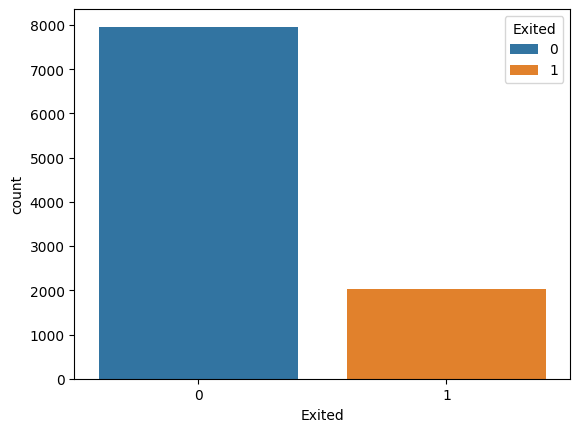

In [1062]:
sns.countplot(x='Exited',data=data,hue='Exited')
plt.show()

In [1063]:
#Divide data into independent and dependent features

In [1064]:
X=data.iloc[:,3:13]
Y=data.iloc[:,13]
X.shape

(10000, 10)

In [1065]:
#Feature Engineering
from sklearn.preprocessing  import LabelEncoder
Geography_encoder=LabelEncoder()
data['Geography_en']= Geography_encoder.fit_transform(data['Geography'])
Gender_encoder=LabelEncoder()
data['Gender_en']= Gender_encoder.fit_transform(data['Gender'])
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,data[['Geography_en','Gender_en']]],axis=1)

In [1066]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_en,Gender_en
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [1067]:
Y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [1068]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [1069]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [1070]:
X_train.shape

(8000, 10)

In [1071]:
X_test.shape

(2000, 10)

In [1072]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.10643166,
         1.51919821, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.74866447,
         0.3131264 ,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ...,  1.48533467,
        -0.89294542, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  1.41231994,
        -0.89294542,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.84432121,
         1.51919821, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.32472465,
         0.3131264 , -1.09168714]], shape=(8000, 10))

In [1073]:
Y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [1074]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.61085707,
         0.3131264 , -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.49587037,
        -0.89294542, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.42478674,
         1.51919821, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.71888467,
         1.51919821,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -1.54507805,
         0.3131264 ,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.61255917,
         0.3131264 ,  0.91601335]], shape=(2000, 10))

In [1075]:
#Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU,Dropout,Input
from keras.regularizers import l2


### Intialize ANN

In [1076]:
classifier=Sequential()
classifier.add(Input(shape=(10,)))

### Adding input Layer

In [1077]:
classifier.add(Dense(units=128,activation='relu', kernel_regularizer=l2(0.001)))
classifier.add(Dropout(0.3))

### Adding 1st hidden Layer

In [1078]:
classifier.add(Dense(units=64,activation='relu', kernel_regularizer=l2(0.001)))
classifier.add(Dropout(0.2))

### Adding 2nd hidden Layer

In [1079]:
classifier.add(Dense(units=32,activation='relu', kernel_regularizer=l2(0.001)))
classifier.add(Dropout(0.2))

### Adding the Output Layer

In [1080]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [1081]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [1082]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.005)

### Early Stopping Implementation

In [1083]:
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [1084]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=Y_train)

In [1085]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping,class_weight={0: weights[0], 1: weights[1]}
)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6917 - loss: 0.7097 - val_accuracy: 0.7160 - val_loss: 0.6388
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7330 - loss: 0.6195 - val_accuracy: 0.7580 - val_loss: 0.5546
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7552 - loss: 0.5798 - val_accuracy: 0.7611 - val_loss: 0.5470
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7608 - loss: 0.5633 - val_accuracy: 0.7338 - val_loss: 0.5796


In [1086]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Summarize history for accuracy

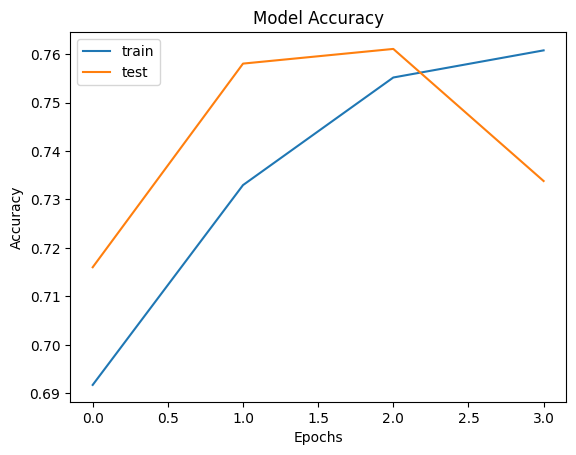

In [1087]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','test'])
plt.show()

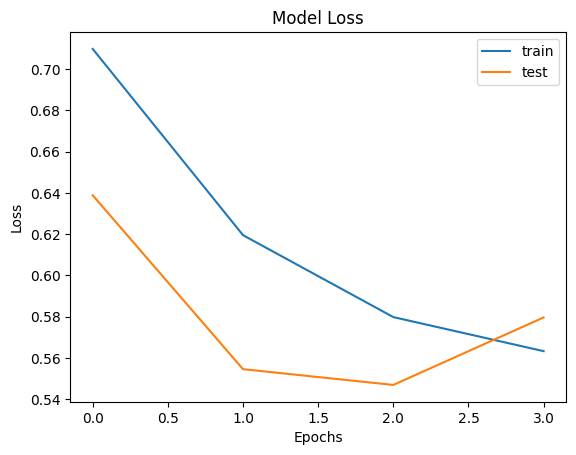

In [1088]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','test'])
plt.show()

### Classifier Prediction

In [1089]:
y_pred =classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [1090]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm =confusion_matrix(Y_test,y_pred)
cm

array([[1128,  467],
       [  83,  322]])

In [1091]:
ac=accuracy_score(Y_test,y_pred)
ac

0.725

In [1092]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.4081
Recall: 0.7951
F1 Score: 0.5394


In [1093]:
import numpy as np
test_data = np.array([[772, 42, 3, 75075.31, 2, 1, 0, 92888.52, 2, 1]])
test_data = sc.transform(test_data)
prediction = classifier.predict(test_data)
predicted_label = (prediction > 0.5).astype(int)
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1]]


C:\Users\Adhi Ganapathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1094]:
print(prediction)

[[0.6017525]]


In [1095]:
import pickle
filepath="PickleFile.pkl"
with open(filepath,'wb') as file:
    pickle.dump(sc,file)
    pickle.dump(ac,file)

In [1096]:
from keras.saving import save_model
save_model(classifier,'Model.keras')
